# Spatial analysis of $b$.

This notebook i) plots the values of $b$ on a global map and ii) assigns the Koppen classification, the Holdridge life zones and land cover to each site and compares and evaluates if their $b$ show some pattern related.

## Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame
from shapely.geometry import Polygon, Point
import pingouin as pt

/home/_ehoyos/snap/jupyter/common/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


## Paths

In [6]:
pathr='/home/_ehoyos/Documents/Data_CO2/Final_info/' # path to read the data.
paths='/home/_ehoyos/Documents/Data_CO2/Final_results/' # path to save the results.

## Global map

Text(81.375, 0.5, 'Latitude')

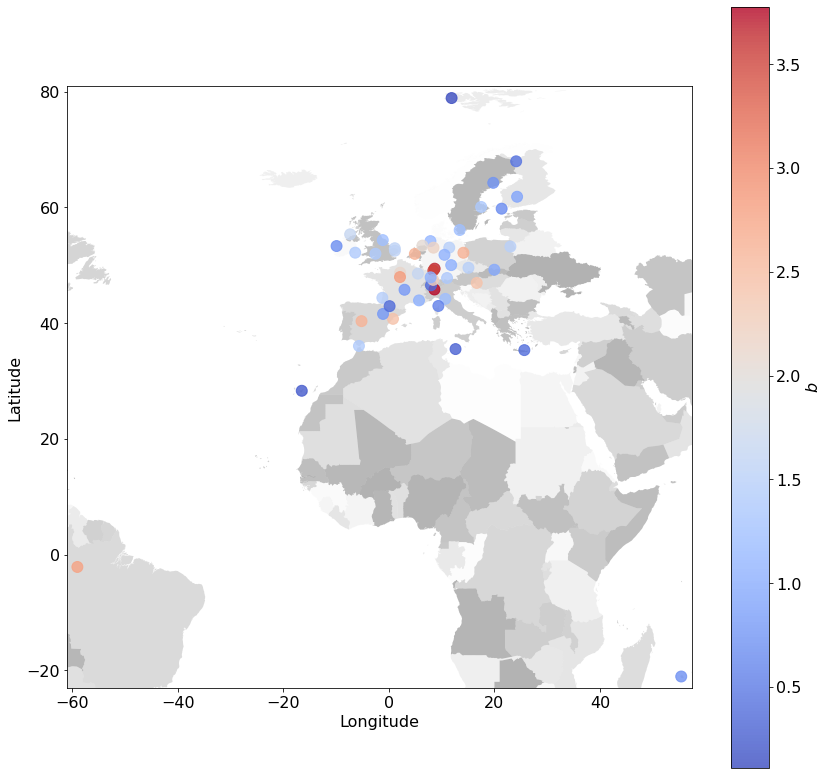

In [19]:
file=pathr+'Other_info/Info_fit.csv'
info_db=pd.read_csv(file) # dataframe with data obtained in the previous step (characterization of pdf).
file=pathr+'Other_info/info_sites_spatial.csv'
sites_db=pd.read_csv(file) 
all_countries=GeoDataFrame.from_file(pathr+'Other_info/Shapefiles/world-administrative-boundaries.shp')

nSites=len(sites_db)    
b_mean=np.zeros(nSites);std_mean=np.zeros(nSites)
nb_mean=np.zeros(nSites); nstd_mean=np.zeros(nSites) # normalized by the mean of CO2.
nb_stdev=np.zeros(nSites); nstd_stdev=np.zeros(nSites) # normalized by the standard deviation of CO2.

for i in range(nSites):
    site=sites_db['Code'][i]
    b_mean[i]=info_db['b'][info_db['Site']==site].mean()
    nb_mean[i]=np.mean(info_db['b'][info_db['Site']==site]/
                       info_db['mean_CO2'][info_db['Site']==site])
    nb_stdev[i]=np.mean(info_db['b'][info_db['Site']==site]/
                        info_db['stdev_CO2'][info_db['Site']==site])
    std_mean[i]=info_db['stdev'][info_db['Site']==site].mean()
    nstd_mean[i]=np.mean(info_db['stdev'][info_db['Site']==site]/
                         info_db['mean_CO2'][info_db['Site']==site])
    nstd_stdev[i]=np.mean(info_db['stdev'][info_db['Site']==site]/
                           info_db['stdev_CO2'][info_db['Site']==site])

#define the coordinates at the extent of points data for the map.
margin_width=2
lon_range=[sites_db['Lon'].min()-margin_width,sites_db['Lon'].max()+margin_width]
lat_range=[sites_db['Lat'].min()-margin_width,sites_db['Lat'].max()+margin_width]

# create a rectangle from these coordinates.
spatial_extent=Polygon([(lon_range[0],lat_range[0]),
    (lon_range[0],lat_range[1]),
    (lon_range[1],lat_range[1]),
    (lon_range[1],lat_range[0])])

# get the shapes with geopandas intersects, which pulls the full shape.
countries=all_countries[all_countries['geometry'].intersects(spatial_extent)]
countries=countries[countries['iso_3166_1_']!='RU']
countries=countries[countries['iso_3166_1_']!='GL']

plt.rcParams['font.size']='16'
# plot the country boundaries and then the point data
countries.plot(cmap='binary',alpha=0.3,figsize=(14,14))
#rs_scatter=plt.scatter(x=info_base_db['Lon'],y=info_base_db['Lat'],c='red',edgecolor='white',alpha=.4,s=40)
rs_scatter=plt.scatter(x=sites_db['Lon'],y=sites_db['Lat'],c=b_mean,cmap='coolwarm',alpha=.8,s=120)
#cb=plt.colorbar(label='$b$/$\mu$CO$_2$ [-]')
cb=plt.colorbar(label='$b$')
# limit the coordinate space shown to the extent of point data
plt.xlim(lon_range)
plt.ylim(lat_range) 

# set axis labels and title
plt.xlabel('Longitude'); plt.ylabel('Latitude')

## General classifications of vegetation, climate and land cover

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: Mean of empty slice.
/home/_ehoyos/snap/jupyter/common/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/_ehoyos/snap/jupyter/common/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/home/_ehoyos/snap/jupyter/common/lib/python3.7/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/home/_ehoyos/snap/jupyter/common/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


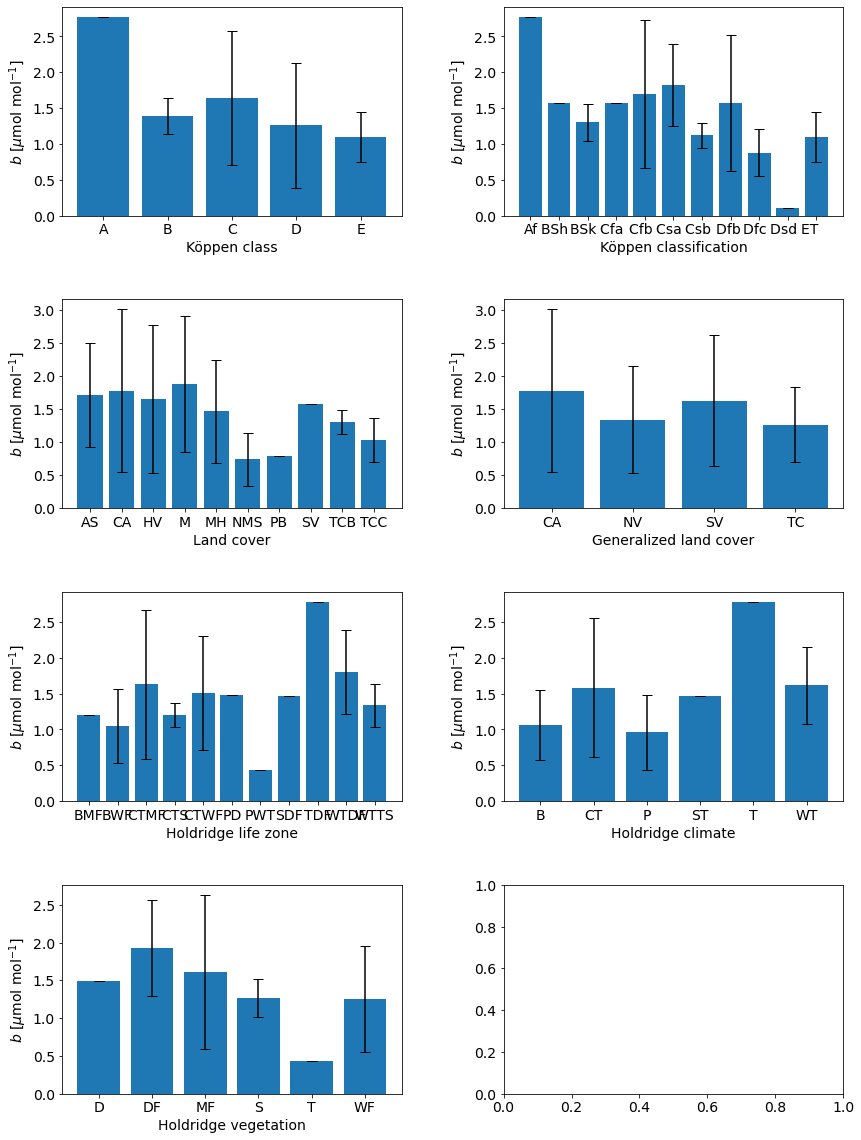

In [29]:
par='b' #'b' or 'stdev'.
nor=0 # normalization. 0: not normalized, 1: normalized by the mean of CO2, 2: normalized by the std. dev. of CO2.
mean=np.zeros(nSites)
stdev=np.zeros(nSites)

for i in range(nSites):
#for i in range(1):
    site=sites_db['Code'][i]
    if nor==0:
        mean[i]=info_db[par][info_db['Site']==site].mean()
        stdev[i]=info_db[par][info_db['Site']==site].std()
        if par=='b': ytit='$b$ [$\mu$mol mol$^{−1}$]' 
        if par=='stdev': ytit='$\sigma$ [$\mu$mol mol$^{−1}$]' 
        
    elif nor==1:
        mean[i]=np.mean(info_db[par][info_db['Site']==site]/
                info_db['mean_CO2'][info_db['Site']==site])
        stdev[i]=np.std(info_db[par][info_db['Site']==site]/
                info_db['mean_CO2'][info_db['Site']==site])
        if par=='b': ytit='$b$/$\mu$CO$_2$ [-]' 
        if par=='stdev': ytit='$\sigma$/$\mu$CO$_2$ [-]' 
    elif nor==2:
        mean[i]=np.mean(info_db[par][info_db['Site']==site]/
                info_db['stdev_CO2'][info_db['Site']==site])
        stdev[i]=np.std(info_db[par][info_db['Site']==site]/
                info_db['stdev_CO2'][info_db['Site']==site])
        if par=='b': ytit='$b$/$\sigma$CO$_2$ [-]' 
        if par=='stdev': ytit='$\sigma$/$\sigma$CO$_2$ [-]' 


plt.rcParams['font.size']='14'            
fig,axs=plt.subplots(4,2,figsize=(14,20))            

# Köppen class, Köppen code, Holdridge code, and cover land code.
prop=['Koppen class','Koppen code','Land cover','LC simplificado',
      'Holdridge','Holdridge climate','Holdridge vegetation']
titles=['Köppen class','Köppen classification','Land cover','Generalized land cover',
        'Holdridge life zone','Holdridge climate','Holdridge vegetation']
a1=[0,0,1,1,2,2,3,3]; a2=[0,1,0,1,0,1,0,1]
#for j in range(7):
for j in range(len(prop)):
    set_prop=np.sort(list(set(sites_db[prop[j]])))
    nn=len(set_prop)
    mean_prop=np.zeros(nn); stdev_prop=np.zeros(nn)
    for i in range(nn):
    #print(set_kp1[i])
        mean_prop[i]=mean[sites_db[prop[j]]==set_prop[i]].mean()
        stdev_prop[i]=mean[sites_db[prop[j]]==set_prop[i]].std()
    
    axs[a1[j],a2[j]].bar(set_prop,mean_prop,yerr=stdev_prop,capsize=5)
    axs[a1[j],a2[j]].set_xlabel(titles[j])
    axs[a1[j],a2[j]].set_ylabel(ytit)
plt.subplots_adjust(wspace=0.3,hspace=0.4)

### Summary

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice.
  


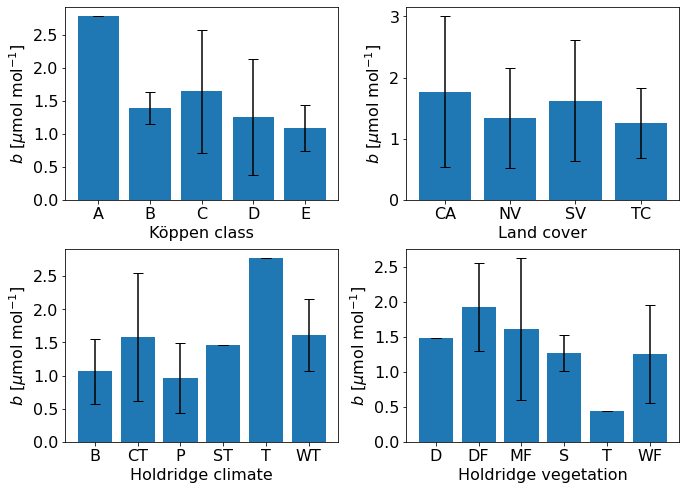

In [31]:
figure,axs=plt.subplots(2,2,figsize=(11,8))  
plt.rcParams.update({'font.size':16}) 
prop=['Koppen class','LC simplificado','Holdridge climate','Holdridge vegetation']
titles=['Köppen class','Land cover','Holdridge climate','Holdridge vegetation']


a1=[0,0,1,1]; a2=[0,1,0,1]
for j in range(len(prop)):
    set_prop=np.sort(list(set(sites_db[prop[j]])))
    nn=len(set_prop)
    mean_prop=np.zeros(nn); stdev_prop=np.zeros(nn)
    for i in range(nn):
    #print(set_kp1[i])
        mean_prop[i]=mean[sites_db[prop[j]]==set_prop[i]].mean()
        stdev_prop[i]=mean[sites_db[prop[j]]==set_prop[i]].std()
    
    axs[a1[j],a2[j]].bar(set_prop,mean_prop,yerr=stdev_prop,capsize=5)
    axs[a1[j],a2[j]].set_xlabel(titles[j])
    axs[a1[j],a2[j]].set_ylabel(ytit)
plt.subplots_adjust(wspace=0.25,hspace=0.25)
figure.savefig(paths+"b_macrovariables.pdf", bbox_inches='tight')

### Statistical differences

In [38]:
for j in range(3,4):
    set_prop=np.sort(list(set(sites_db[prop[j]])))
    nn=len(set_prop)
    mean_prop=np.zeros(nn); stdev_prop=np.zeros(nn)
    for i in range(nn):
        mean_prop[i]=mean[sites_db[prop[j]]==set_prop[i]].mean()
        stdev_prop[i]=mean[sites_db[prop[j]]==set_prop[i]].std()
               
set_prop

pt.ttest(mean[sites_db[prop[j]]==set_prop[3]],mean[sites_db[prop[j]]==set_prop[3]], paired=True)

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice.
  
/home/_ehoyos/snap/jupyter/common/lib/python3.7/site-packages/pingouin/parametric.py:232: UserWarning: x and y are equals. Cannot compute T or p-value.
  warnings.warn("x and y are equals. Cannot compute T or p-value.")


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,NaN,3,two-sided,NaN,"[nan, nan]",0.0,nan,0.05
